## **Introduction: Predicting Diabetes Using Classification**

Diabetes is a chronic disease that affects millions of people worldwide including  a few members in my family, and early detection is crucial for managing and preventing serious complications. With the growing availability of medical data, machine learning can help identify patterns that may indicate whether a person is at risk for diabetes based on key health indicators. In this project, I will develop a classification model to predict whether an individual has diabetes based on a given set of health measurements. This analysis will explore different machine learning techniques to determine the most effective approach for accurate classification.

By analyzing the data and models, I aim to answer the following questions:

1. Which classification model, Decision Tree or Random Forest, performs better in predicting diabetes?  
2. Does the Decision Tree model show signs of overfitting, and can hyperparameter tuning improve performance?  


 
## **Dataset Overview**
This kaggle dataset isfrome the Pima Indians Diabetes Database, originally from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). It contains medical and demographic information about women of Pima Indian heritage, with the goal of predicting whether an individual has diabetes based on health measurements. The dataset consists of 768 observations with 8 medical features and a binary target variable (Outcome), where 1 indicates diabetes and 0 indicates no diabetes.

The dataset includes 9 key features:

- **Pregnancies**: Number of times the patient has been pregnant.  
- **Glucose**: Plasma glucose concentration (mg/dL).  
- **BloodPressure**: Diastolic blood pressure (mm Hg).  
- **SkinThickness**: Triceps skinfold thickness (mm).  
- **Insulin**: 2-hour serum insulin (μU/mL).  
- **BMI**: Body Mass Index (weight in kg/height in m²).  
- **DiabetesPedigreeFunction**: A function that represents diabetes likelihood based on family history.  
- **Age**: Patient's age in years.  
- **Outcome**: Target variable (0 = No diabetes, 1 = Diabetes).   

Dataset Source: [Prima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  

## **Importing libraries and loading the data**
- First, we will import libraries necessary for working with our data, such as pandas and numpy.
- We will also import plotting libraries like seaborn and matplotlib.

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("diabetes.csv")

## **Understanding the data**
Now I will look at the different columns, dtypes, shape of dataframe, and also the balance of between the data.

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
df.shape

(768, 9)

In [69]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: xlabel='Outcome', ylabel='count'>

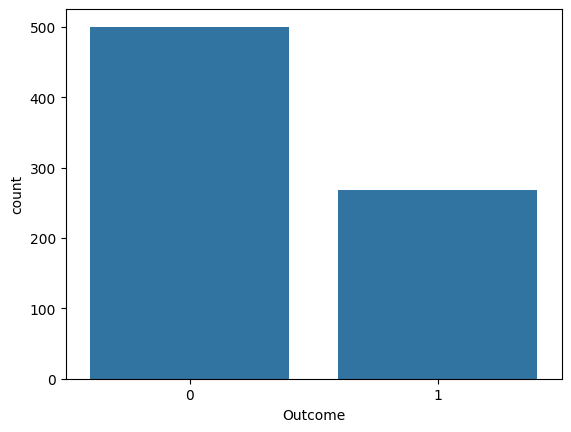

In [71]:
sns.countplot(x="Outcome", data=df)

According to the plot above, this dataset has much more '0' and '1'. This means the data is not very balanced and has more patients who tested negative for diabetes than positve. This is something we will have to keep this in mind later when evaluating our model.

## **Preprocessing the Data**
Before performing any analysis, we need to ensure the data is clean and usable. While the majority of the column titles are already cleaned, we will still follow a few data cleaning steps:

- Dealing with any null values
- Renaming the column names to lowercase

In [78]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The data looks clean and has no missing values, so there is nothing to modify except for making the columns lowercase using the rename function.

In [84]:
df = df.rename(columns={
    "Pregnancies": "pregnancies",
    "Glucose": "glucose",
    "BloodPressure": "blood_pressure",
    "SkinThickness": "skin_thickness",
    "Insulin": "insulin",
    "BMI": "bmi",
    "DiabetesPedigreeFunction": "diabetes_pedigree",
    "Age": "age",
    "Outcome": "outcome"
})
df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age', 'outcome'],
      dtype='object')

## **Data Visualization**
Before training the model, we want to examine which features are the most important and which might be redundant. Selecting the best features will help improve the model's performance and prevent unnecessary complexity. Using a scatter matrix, we can visualize the relationships between different features and identify which ones have the strongest correlation.


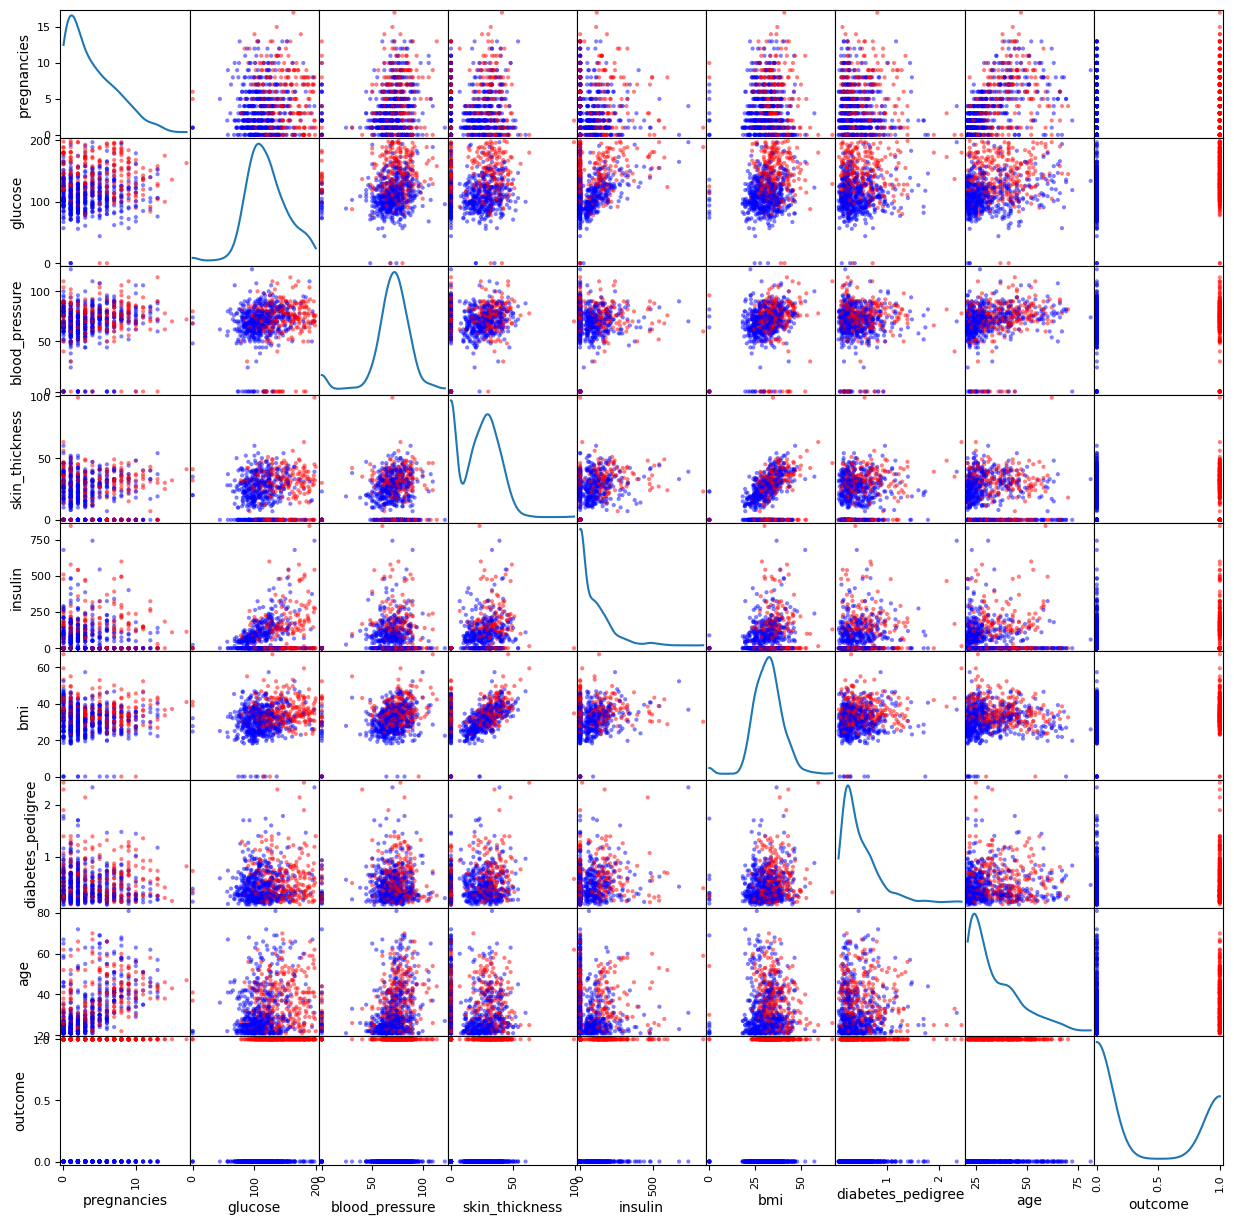

In [97]:
from pandas.plotting import scatter_matrix
color_map = df["outcome"].map({0: "Blue", 1: "Red"})
scatter_matrix(df, figsize=(15, 15), c=color_map, diagonal="kde", alpha=0.5)
plt.show()

One of the most noticeable patterns is in the Outcome column, where the red (diabetic) and blue (non-diabetic) points are completely separated along both the horizontal and vertical axes. This indicates that the model should be able to distinguish between the two classes based on the available features. Among the features, Glucose shows the strongest separation, with higher glucose levels being associated with diabetes. However, features like Insulin, Blood Pressure, and Skin Thickness do not show a strong distinction between diabetic and non-diabetic individuals, which could mean they are less useful for classification.

## **Spliting Data**
We will need to split our data into train and testing for the model to pick up treads and make predictions.

In [115]:
from sklearn.model_selection import train_test_split

data=df.iloc[:, 1:]
target=df['outcome']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(y_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(y_test.shape))

Train data shape: (614, 8)
Train target shape: (614,)
Test data shape: (154, 8)
Test target shape: (154,)


## **Training the Model**
Next, we can train the first model which will be a decsion tree.

In [122]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, t_train)

train_score = model.score(X_train, t_train)
test_score = model.score(X_test, t_test)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 1.0
Test Accuracy: 0.474025974025974



The model currenlty has a very low test accuarcy and we can imp

## **Findings & Storytelling**


## **Impact**

## **Challenges**